# Core Statistics Using Python
### Hana Choi, Simon Business School, University of Rochester


# Assignment 4 Solutions

- Ship valuation: regressions predicting sales price of a ship based on its features

## Required packages

In [17]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [81]:
ship_data = pd.read_csv("/Users/hanachoi/Dropbox/teaching/core_statistics/Assignments/Data/ShipDataExhibit4.csv", thousands=',')

# Display the first few rows of the dataframe
ship_data.head()

,Ship,SaleData,VesselName,SalePrice,YrBuilt,Age,DWT,Cindex
0,1,Jan-07,Lowlands Beilun,73.0,1999,8,170.2,4647.083333
1,2,Jan-07,CHS Moon,45.0,1991,16,150.2,4647.083333
2,3,Jan-07,Spring Brave,62.0,1995,12,151.1,4647.083333
3,4,Jan-07,Martha Verity,60.0,1995,12,158.0,4647.083333
4,5,Jan-07,TMT TBN,61.3,1993,14,174.7,4647.083333


# Question 1

- The closest comparable would seem to be either the Cape Sun (#45) or the Sumihou (#33). 
- Based on these comparables, the Bet Performer appears to be worth somewhere between 106 and 135 million. 
- Splitting the difference, a good estimate might be 120.5M, but you could have chosen 106 or 135 as well.
- As an aside, Fertilia (#21), Zorbas II (#20) are not good comparable ships, since Baltic Dry Capesize Index doubled since then (6,201=>12479).
- Note that the potential client showed interest in buying the ship in May 2008 when Baltic Dry Capesize Index was 12479.
- As the Harvard case reads on p.2 and p.3, the major determinant of a ship's cash flows is the charter rate (e.g., the Baltic Dry Capesize Index), which affects the valuation of the ships. If you look at Exhibit 4, as the Baltic Dry Capesize Index increases, the sales price increases (for similar age and size ships). 
- That's why the third paragraph on p.3 says that we need to identify the purchase prices for the most recently completed transactions of comparable ships, because the charter rate fluctuates over time.
- So Baltic Dry Capesize Index becomes an important factor, when finding the comparable transactions, and we consider this factor in the subsequent regression analysis, too.

# Question 2

## Question 2 (a)

- We should expect price to increase with size and charter rates, and decrease with age.  
- The logic of age is depreciation, as well as the fact that newer ships are likely to be more fuel efficient. 
- The logic of of size is hauling capacity (larger ships can carry more cargo). 
- Finally, charter rates determine the cash flows that the ship can generate (assuming that the charter rates reflect demand conditions, rather than costs). 
- See below for visual evidence of these claims - though you did not need to do this to answer the question.

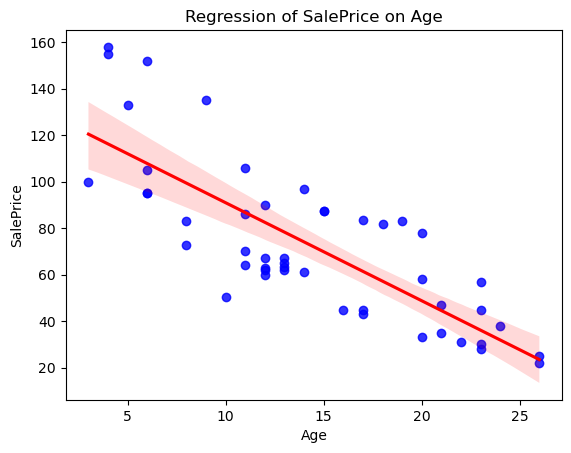

In [82]:
# Relationship between Age vs. SalePrice
sns.regplot(x='Age', y='SalePrice', data=ship_data, color='blue', line_kws={'color': 'red'})
plt.title('Regression of SalePrice on Age')
plt.show()

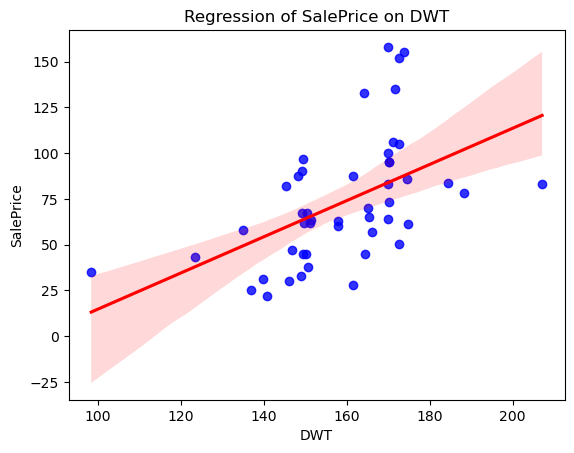

In [83]:
# Relationship between DWT vs. SalePrice
sns.regplot(x='DWT', y='SalePrice', data=ship_data, color='blue', line_kws={'color': 'red'})
plt.title('Regression of SalePrice on DWT')
plt.show()

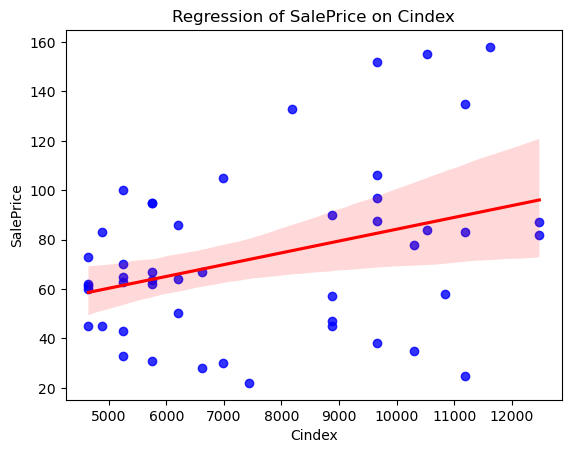

In [84]:
# Relationship between Cindex vs. SalePrice
sns.regplot(x='Cindex', y='SalePrice', data=ship_data, color='blue', line_kws={'color': 'red'})
plt.title('Regression of SalePrice on Cindex')
plt.show()

## Question 2 (b)

- There are lots of possible answers here: ship condition, input prices, included equipment, builder quality, location of sale, etc. etc. 
- You should have identified two or three and explained their roles (i.e. ships in better condition will be worth more, more efficient ships should be worth more, etc.).

## Question 2 (c)

- According to our multiple regression output and R-squared, we are explaining 92% of the variation in price with these three factors.
- As an aside, adjusted-R2 is not the correct answer here.
- R2 captures the percentage of the total variation in Y "explained" by the estimated regression model (handout8).
- On the other hand, adjusted-R2 measures the adjusted-fit by imposing a penalty factor (so it's not exactly ESS/TSS).
- Adjusted-R2 is useful when comparing one model to the other, especially when they have different #Xs.

In [85]:
fit = smf.ols(formula='SalePrice ~ Age + DWT + Cindex', data=ship_data).fit()

# Extract R-squared from the summary output
print(fit.rsquared)

0.9204311911537961


## Question 2 (d)

### Predicted value

In [91]:
# Prepare new data for prediction
new_data = pd.DataFrame({
    'Age': [11],
    'DWT': [172],
    'Cindex': [12479]
})

# The predicted price is 125.8M.
predicted_price = fit.predict(new_data)
print("Predicted Price: ", predicted_price.iloc[0])

Predicted Price:  125.83007563851692


### Confidence interval for average prediction  

In [87]:
# Get prediction results object for interval calculations
predictions = fit.get_prediction(new_data)

# Confidence interval
confidence_interval = predictions.conf_int()
print("Confidence Interval: ", confidence_interval)

Confidence Interval:  [[118.8901254  132.77002588]]


### Prediction interval for specific prediction

In [88]:
# Prediction interval
prediction_interval = predictions.conf_int(obs=True)
print("Prediction Interval: ", prediction_interval)

Prediction Interval:  [[104.74013963 146.92001165]]


## Question 2 (e)

- When writing code, we want to avoid repeatedly writing the same code.
- In this assignment, we are conducting regression analyses repeatedly for different companies.
- To minimize redundancy and enhance code readability, we can define a function that runs linear regression and prints out the summary.

In [92]:
# Predict for 5 years younger
data1 = pd.DataFrame({'Age': [6], 'DWT': [172], 'Cindex': [12479]})
prediction1 = fit.predict(data1)
print("5 years younger: {:.2f}M".format(prediction1.iloc[0]))

# Predict for 20K DWT smaller
data2 = pd.DataFrame({'Age': [11], 'DWT': [152], 'Cindex': [12479]})
prediction2 = fit.predict(data2)
print("20K DWT smaller: {:.2f}M".format(prediction2.iloc[0]))

# Predict for 30% lower Capesize Index
data3 = pd.DataFrame({'Age': [11], 'DWT': [172], 'Cindex': [8735]})
prediction3 = fit.predict(data3)
print("30% lower Capesize Index: {:.2f}M".format(prediction3.iloc[0]))

5 years younger: 148.55M
20K DWT smaller: 120.99M
30% lower Capesize Index: 98.85M


# Question 3

- It is really up to you to say something sensible here. 
- The easiest answer is to simply recommend that he offer $125 million. 
- A case can be made for offering less (based on leaving yourself some room for negotiation, though the case suggests that this is a seller's market and low bids frequently disqualify you from negotiation (page 3). 
- Another option to consider is leasing (chartering) the ship rather than buying it. 
- You might also push for getting more data (e.g. about the ship's condition, maintenance records) and doing a physical inspection (this is pretty standard). 
- Additional information about the market (e.g. the trends for fuel costs and steel prices) would also be useful, as well as more information about lending conditions.